## Mandelbrot and Julia set animations 

In [1]:
# %matplotlib inline  
import numpy as np
from numpy import sqrt, log2, arctan2, sin, cos

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style
from matplotlib.animation import FuncAnimation as FA
from time import time

from numba import jit

import IPython
from IPython.display import display, Markdown
import ipywidgets as widgets

import plotly.graph_objects as go
import plotly.express as px

# plt.rcParams["figure.figsize"]=(20,20) #sets the default image size
# plt.rcParams["figure.dpi"]=(300)

In [2]:
@jit(forceobj=True)
def Julia(cx, cy, 
          center_x=0, 
          center_y=0, 
          frame_radius=2, 
          max_iter=100, 
          resolution=500):
    C = complex(cx, cy)
    R = (1 + sqrt(1 + 4*sqrt(cx*cx + cy*cy)))/2 #escape radius
    
    xmin = center_x - frame_radius
    xmax = center_x + frame_radius
    ymin = center_y - frame_radius
    ymax = center_y + frame_radius
    # NxN matrix populated with zeros
    z_arr = np.zeros([resolution,resolution], dtype=float, order='C')
    
    x = np.linspace(xmin, xmax, resolution)
    y = np.linspace(ymin, ymax, resolution)
   
    for _x in range(len(x)):
        for _y in range(len(y)):
            i = 0
            z = complex(x[_x],y[_y])
            while abs(z) < R and i < max_iter:
                z = z*z + C
                i +=1
                
            if abs(z) >= R:
                for j in range(2):
                    z = z*z + C
                    i +=1
                if abs(z) > 0:
                    i -= log2(log2(abs(z)))
            
            if i > 0:
                z_arr[_y,_x] = i
            else:
                z_arr[_y,_x] = 0
            
    return z_arr

@jit(forceobj=True)
def Mandelbrot(center_x, 
               center_y, 
               frame_radius=2, 
               max_iter=100, 
               resolution=500 , 
               escape_radius = 2):

    R = escape_radius

    xmin = center_x - frame_radius
    xmax = center_x + frame_radius
    ymin = center_y - frame_radius
    ymax = center_y + frame_radius
    # NxN matrix populated with zeros
    z_arr = np.zeros([resolution,resolution], dtype=float, order='C')
    
    x = np.linspace(xmin, xmax, resolution)
    y = np.linspace(ymin, ymax, resolution)

    
    for _x in range(len(x)):
        for _y in range(len(y)):
            i = 0
            z = complex(0,0)
            C = complex(x[_x],y[_y])
            while abs(z) <= R and i <= max_iter:
                z = z*z + C
                i +=1
                
            if abs(z) > R:
                for j in range(2):
                    z = z*z + C
                    i +=1

            z_arr[_y,_x] = i
            
    return z_arr

Used to find where the animation should end up

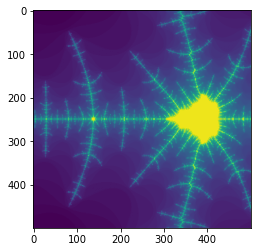

In [3]:
# Mandelbrot(center_x, center_y, frame_radius=2, max_iter=100, resolution=500 , escape_radius = 2):
# img0 = Mandelbrot(0,0,frame_radius=2, resolution = 200)
img1 = Mandelbrot(-1.42, 0, frame_radius=.005, resolution = 500)

# plt.imshow(img0)
plt.imshow(img1)
plt.show()

The actual animation

<IPython.core.display.Javascript object>


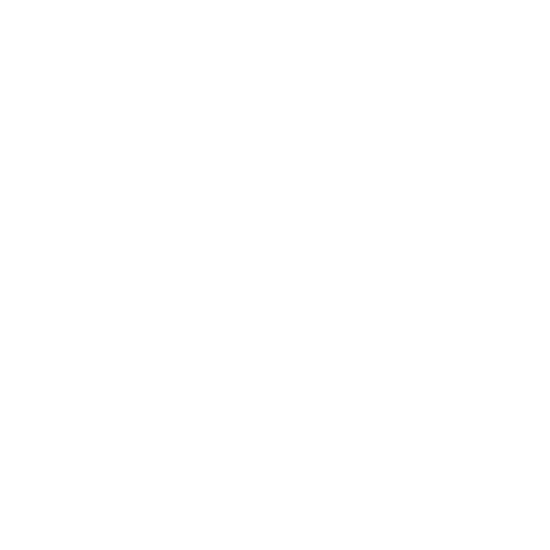

......

Done!


In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

fps = 60
nSeconds = 5
res = 500

fig = plt.figure(figsize=(5,5))

starting_graph = Mandelbrot(0,0, resolution=res)
# im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
im = plt.imshow(starting_graph)

xiter = np.linspace(0, -1.39, nSeconds * fps)
riter = np.linspace(2, 0.025, nSeconds * fps)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(Mandelbrot((xiter[i]),0, 
                            frame_radius = riter[i], 
                            resolution=res))
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

# anim.save('test_anim_mandelbrot.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

print('Done!')

In [ ]:
# Julia(cx, cy, center_x=0, center_y=0, frame_radius=2, max_iter=100, resolution=500):
# img0 = Julia(-0.79, -0.15, center_x=0, center_y=0, frame_radius=2, max_iter=100, resolution=500)
img1 = Julia(-0.79, 
             -0.15, 
             center_x=-1.455, 
             center_y=-0.08, 
             frame_radius=0.11, 
             max_iter=100, 
             resolution=500)

# plt.imshow(img0)
plt.imshow(img1)
plt.show()

<IPython.core.display.Javascript object>


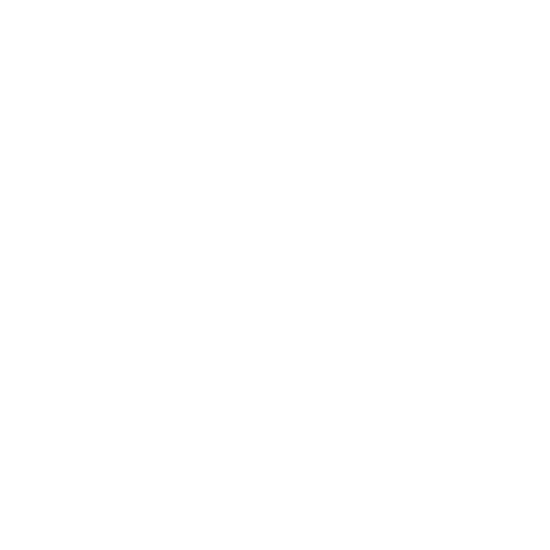

......

Done!


In [6]:


fps = 60
nSeconds = 5
res = 500

fig = plt.figure(figsize=(5,5))

starting_graph = Julia(-0.79, -0.15, 
                       center_x=0, 
                       center_y=0, 
                       frame_radius=2,
                       max_iter=100, 
                       resolution=res)
# im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
im = plt.imshow(starting_graph)

xiter = np.linspace(0, -1.46, nSeconds * fps)
yiter = np.linspace(0, -0.08, nSeconds * fps)
riter = np.linspace(2, 0.011, nSeconds * fps)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(Julia(-0.79, -0.15, 
                       center_x=xiter[i], 
                       center_y=yiter[i], 
                       frame_radius=riter[i], 
                       max_iter=100, 
                       resolution=res))
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )


video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

print('Done!')

In [ ]:
fps = 60
nSeconds = 15
res = 500
max_iter=81

citer = np.linspace(0, 2*np.pi, nSeconds * fps)

fig = plt.figure(figsize=(5,5),)

starting_graph = Julia(cx=0.7885, 
                       cy=0,
                       frame_radius = 2, 
                       max_iter=max_iter, 
                       resolution=res)
# im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
im = plt.imshow(starting_graph, cmap='twilight_shifted')

xiter = np.linspace(0, -1.39, nSeconds * fps)
riter = np.linspace(2, 0.025, nSeconds * fps)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    cx= 0.7885*cos(citer[i])
    cy= 0.7885*sin(citer[i])
    im.set_array(Julia(cx=cx, 
                       cy=cy, 
                       frame_radius = 2, 
                       max_iter=max_iter, 
                       resolution=res))
#     im.set_array(Mandelbrot((xiter[i]),0, frame_radius = riter[i], resolution=res))
    return [im]


anim = FA(fig, 
          animate_func, 
          frames = nSeconds * fps,
          interval = 1000 / fps, # in ms
        )
# video = anim.to_html5_video()


video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
print('Done!')

<IPython.core.display.Javascript object>

...